<a href="https://colab.research.google.com/github/duridudu/dupository/blob/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_chpater_04_2_%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC_%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**확률적 경사 하강법**
* 럭키백이 너무 인기 많아져서 우리 업체에 생선 팔겠다는 사람 쇄도! 샘플 알지도 못하고 확률 계산하기 힘들어짐

  ==> 조금씩 계속 추가되는 샘플을 어케 훈련할까? (훈련 데이터가 모두 준비되어 있지 않고 매일매일 업데이트되어도 학습 이어나가기 가능)

* **점진적 학습** : 기존의 모델을 유지하면서 추가되는 새 데이터를 조금씩 더 훈련하는 것. 대표적인 예가 확률적 경사 하강법

* **확률적 경사 하강법** 

  : 훈련셋에서 랜덤으로 하나의 샘플을 골라 가파른 경사를 조금 내려오고, 다음 샘플을 골라 또 조금 
  내려온다. 
  
   그랬는데 경사 안끝났으면(가고자 하는 위치에 못 갔으면)? 처음부터 다시

  by. **SGDClassifier 클래스** of sklearn.linear_model 패키지

  ==> 모델을 추가적으로 훈련 가능. **partial_fit()** 메소드로. (fit과 같지만 호출할 때마다 1 에포크씩 이어서 훈련할 수 있음)

  ==> SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춤. tol 매개변수에 향상될 최솟값을 지정. 
  
  None으로 하면 max_iter만큼 무조건 반복하도록 하는 것.


* **에포크** :  확률적 경사 하강법에서 훈련셋을 한 번 모두 사용하는 과정. 일반적으로 수십, 수백 번 이상 에포크를 수행한다.

  ==> 에포크 횟수가 적으면 모델이 훈련세트를 덜 학습함. 훈련셋과 테스트셋에 잘 맞지 않는 과소적합된 모델일 가능성이 많다

  ==> 에포크 횟수가 많을수록 정확도가 증가하지만 어느 순간 감소함. 과대적합되기 시작한 곳. 따라서 과대적합이 시작되기 전 훈련을 멈추는 **조기 종료** 해야함. 
</br>
* 한 개 말고 여러개 랜덤 샘플 선택하면 **미니배치 경사 하강법**, 전체 샘플을 이용하여 경사로 조금 내려가면 **배치 경사 하강법**

  ==> 그래서 내려가고자 하는 산은 ? **손실 함수**

* **손실 함수** : 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준. 분류에서 손실은? 정답을 못 맞히는 것!

 경사 하강법으로 조금씩 내려와야 하기 때문에 손실 함수는 **미분 가능한 연속**함수여야 한다~!

 ==> 양성 클래스(타깃=1)일 때 손실은 -log(예측확률). 예측 확률이 1에서 멀어질수록 손실은 아주 큰 양수 됨.

 ==> 음성 클래스(타깃=0)일 때 손실은 -log(1-예측확률). 예측 확률에 0에서 멀어질수록 손실은 아주 큰 양수 됨.

 ==> **로지스틱 손실 함수** 혹은 **이진 크로스엔트로피 손실 함수**라고 함.

 ==> 다중분류에서는 **크로스엔트로피 손실 함수** 사용

 ==> 보통 회귀에서는 **평균 제곱 오차(Mean Square Error)** 많이 사용


In [2]:
import pandas as pd
fish=pd.read_csv('https://bit.ly/fish_csv_data')

#species 열은 타깃 데이터, 나머지는 입력 데이터
fish_input=fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target=fish['Species'].to_numpy()

#훈련셋과 테스트셋으로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target=train_test_split(fish_input, fish_target, random_state=42)

#훈련세소가 테스트셋의 특성을 표준화 전처리. 훈련세트에서 학습한 통계값으로 테스트셋도 변환해야 함!
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [3]:
#확률적 경사 하강법 제공하는 분류용 클래스 SGDClassifier
from sklearn.linear_model import SGDClassifier

#객체 만들 때 2개의 매개변수 지정
#loss:손실 함수의 종류 지정, 여기서는 로지스틱 손실 함수 지정. 
#max_iter는 수행할 에포크 횟수 지정.
sc=SGDClassifier(loss='log',max_iter=10, random_state=42)
sc.fit(train_scaled, train_target) #트레인셋으로 훈련

print(sc.score(train_scaled, train_target)) #트레인 점수
print(sc.score(test_scaled, test_target))   #테스트 점수

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [4]:
#추가 훈련해보자
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

#점수가 높아지긴 했는데 얼마나 더 늘려야 하는? 에포크 늘리는 기준이 필요하다!

0.8151260504201681
0.825


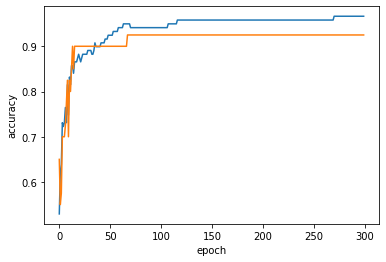

In [6]:
#partial_fit 메소드만 사용하려면 훈련셋에 있는 전체 클래스의 레이블을 partial_fit()에 전달해야함
import numpy as np
sc=SGDClassifier(loss='log', random_state=42)
train_score=[]
test_score=[]
classes=np.unique(train_target)

#300번 에포크 동안 훈련 반복하여 진행
for _ in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

#plot
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

#백 번째 에포크 이후 훈련셋과 테스트셋이 점점 격차 생김-->100번이 적합하겠다!

In [7]:
#반복횟수를 100으로 맞추고 모델 다시 훈련해보자.
sc=SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
